In [146]:
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.providers.aer.noise as noise

In [147]:
# Protocol uses 3 qubits and 1 classical bit in a register
qr = QuantumRegister(3, name="q")    # Protocol uses 4 qubits
cr1 = ClassicalRegister(1, name="cr1") # and 2 classical bit
#cr2 = ClassicalRegister(1, name="cr2")
bit_flip_circuit = QuantumCircuit(qr,cr1)

In [148]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

In [149]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [150]:
def decoding(qc, q0, q1, q2):
    """Creates decoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    qc.ccx(q2,q1,q0) # Apply a Toffoli gate |011> <-> |111>

In [151]:
prob_1 = 0.25 # 1-qubit gate
#prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.phase_amplitude_damping_error(prob_1, 0.1, 1)
#error_1 = noise.amplitude_damping_error(prob_1, 1)
#error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['id'])
#noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

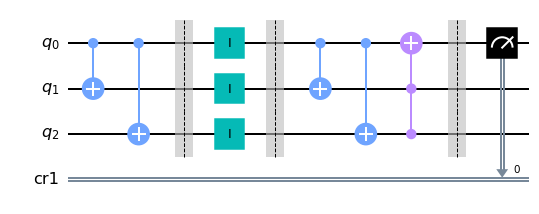

In [152]:
encoding(bit_flip_circuit, 0, 1, 2)

# step 2. error simulation
#bit_flip_circuit.append(Er,[0,1,2,3])
#error_simulation(bit_flip_circuit, 0, 1, 2, p)

bit_flip_circuit.barrier()

bit_flip_circuit.i(0)

bit_flip_circuit.i(1)

bit_flip_circuit.i(2)

bit_flip_circuit.barrier()



# step 3. decoding
decoding(bit_flip_circuit, 0, 1, 2)

# step 4. measurement
measure(bit_flip_circuit, 0, 0)

# View the circuit:
%matplotlib inline
bit_flip_circuit.draw(output='mpl')

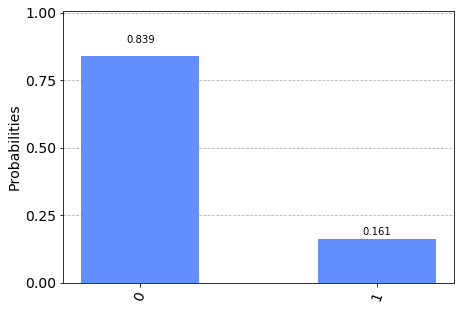

In [153]:
result = execute(bit_flip_circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [154]:
nocor = QuantumCircuit(1,1)

In [155]:
nocor.i(0)
measure(nocor, 0, 0)

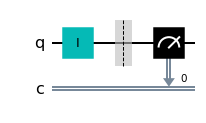

In [156]:
nocor.draw(output='mpl')

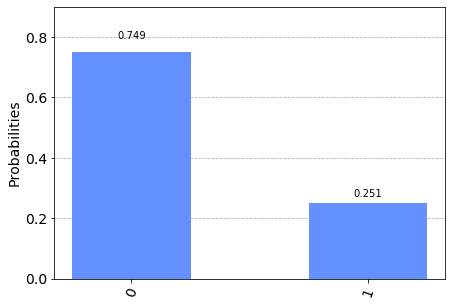

In [157]:
result = execute(nocor, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)